<a href="https://colab.research.google.com/github/RAIHANRABBY/A-Machine-Learning/blob/main/data_analysis_for_student_drop_out_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objectives 
  1. data outlier chart
  2. coorelation chart
  3. dropout and not dropout chart
  4. roc curve before the optimization
  5. Pr curve ------------------------
  6. lift curve ----------------------
  7. gain curve.......................
  8. chi curve.......................
  9. after the optimization curves...roc,pr.gain , lift ,chi

## data wrangling

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sdosfpaddedds.csv')

In [4]:
df.shape

(251, 28)

In [5]:
df.head()

,Age,Gender,Home Language,Father Occupation,Mother Occupation,Number Of Siblings,Father Education,Mother Education,School Distance,Means to school,...,Math,Science,History,Social Science,Religious Study,Family Annual income,Extra Tution,Hours of study per day,Class Label,GPA
0,13-15 years,female,Native Language,Immigrant,Home maker,Four or more,secondary,secondary,1-2 km,Rickshaw,...,35,42,35,25,29,300000,Yes,1 hours,Yes,2.01
1,10-13 years,male,Bangla,Freelancer,Home maker,Three Children,Honors/ Equivalent,secondary,0.5-1 km,Bicycle/motorbike,...,47,50,54,56,91,850000,Yes,3 hours,Yes,3.04
2,13-15 years,female,Native Language,Private sector,Home maker,Three Children,primary,secondary,>7 km,Rickshaw,...,81,90,43,81,31,100000,No,3 hours,No,3.08
3,13-15 years,female,Bangla,Public sector,Freelancer,Three Children,primary,secondary,0-0.5 km,Walk,...,83,54,50,20,82,200000,Yes,1 hours,Yes,2.40
4,10-13 years,male,Native Language,Public sector,Home maker,None,Honors/ Equivalent,primary,1-2 km,Walk,...,52,32,33,28,81,150000,No,1 hours,Yes,2.19


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     251 non-null    object 
 1   Gender                  251 non-null    object 
 2   Home Language           251 non-null    object 
 3   Father Occupation       251 non-null    object 
 4   Mother Occupation       251 non-null    object 
 5   Number Of Siblings      251 non-null    object 
 6   Father Education        251 non-null    object 
 7   Mother Education        251 non-null    object 
 8   School Distance         251 non-null    object 
 9   Means to school         251 non-null    object 
 10  House Lighting          251 non-null    object 
 11  School Infrustructure   251 non-null    object 
 12  School Meal per day     251 non-null    object 
 13  School Cost             251 non-null    object 
 14  Family income source    251 non-null    ob

In [7]:
# df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
df.drop('Unnamed: 15',axis=1,inplace=True)

In [8]:
df.columns

Index(['Age', 'Gender', 'Home Language', 'Father Occupation',
       'Mother Occupation', 'Number Of Siblings', 'Father Education',
       'Mother Education', 'School Distance', 'Means to school',
       'House Lighting', 'School Infrustructure', 'School Meal per day',
       'School Cost', 'Family income source', 'Bangla', 'English', 'Math',
       'Science', 'History', 'Social Science', 'Religious Study',
       'Family Annual income', 'Extra Tution', 'Hours of study per day',
       'Class Label', 'GPA'],
      dtype='object')

In [9]:
df.isnull().sum()

Age                       0
Gender                    0
Home Language             0
Father Occupation         0
Mother Occupation         0
Number Of Siblings        0
Father Education          0
Mother Education          0
School Distance           0
Means to school           0
House Lighting            0
School Infrustructure     0
School Meal per day       0
School Cost               0
Family income source      0
Bangla                    0
English                   0
Math                      0
Science                   0
History                   0
Social Science            0
Religious Study           0
Family Annual income      0
Extra Tution              0
Hours of study per day    0
Class Label               0
GPA                       0
dtype: int64

In [10]:
import random as ra
round(ra.uniform(20,65),1)

53.4

In [11]:
import random as ra
attendance=[]
for i in df['GPA']:
  if i < 1.00 :
    attendance.append(round(ra.uniform(20,30),1))
  elif i<2.00 :
    attendance.append(round(ra.uniform(30,50),1))
  elif i<3.00:
    attendance.append(round(ra.uniform(50,75),1))
  else:
    attendance.append(round(ra.uniform(65,95),1))

In [12]:
df['Attendance Parcentage']=attendance

In [13]:
df.head()

,Age,Gender,Home Language,Father Occupation,Mother Occupation,Number Of Siblings,Father Education,Mother Education,School Distance,Means to school,...,Science,History,Social Science,Religious Study,Family Annual income,Extra Tution,Hours of study per day,Class Label,GPA,Attendance Parcentage
0,13-15 years,female,Native Language,Immigrant,Home maker,Four or more,secondary,secondary,1-2 km,Rickshaw,...,42,35,25,29,300000,Yes,1 hours,Yes,2.01,56.2
1,10-13 years,male,Bangla,Freelancer,Home maker,Three Children,Honors/ Equivalent,secondary,0.5-1 km,Bicycle/motorbike,...,50,54,56,91,850000,Yes,3 hours,Yes,3.04,82.2
2,13-15 years,female,Native Language,Private sector,Home maker,Three Children,primary,secondary,>7 km,Rickshaw,...,90,43,81,31,100000,No,3 hours,No,3.08,78.3
3,13-15 years,female,Bangla,Public sector,Freelancer,Three Children,primary,secondary,0-0.5 km,Walk,...,54,50,20,82,200000,Yes,1 hours,Yes,2.40,74.0
4,10-13 years,male,Native Language,Public sector,Home maker,None,Honors/ Equivalent,primary,1-2 km,Walk,...,32,33,28,81,150000,No,1 hours,Yes,2.19,58.8


## feature engineering

rename the columns

In [14]:
df.columns

Index(['Age', 'Gender', 'Home Language', 'Father Occupation',
       'Mother Occupation', 'Number Of Siblings', 'Father Education',
       'Mother Education', 'School Distance', 'Means to school',
       'House Lighting', 'School Infrustructure', 'School Meal per day',
       'School Cost', 'Family income source', 'Bangla', 'English', 'Math',
       'Science', 'History', 'Social Science', 'Religious Study',
       'Family Annual income', 'Extra Tution', 'Hours of study per day',
       'Class Label', 'GPA', 'Attendance Parcentage'],
      dtype='object')

In [15]:
df.rename({'Home Language':'Language','Father Occupation':'F_occu','Mother Occupation':'M_occu', 
           'Number Of Siblings':'N_of_Sib', 'Father Education':'F_edu','Mother Education':'M_edu',
           'School Distance':'S_Dis', 'Means to school':'M_t_School','House Lighting':'H_Light',
           'School Infrustructure':'Scl_infra', 'School Meal per day':'M_por_d','School Cost':'Scl_cost',
           'Family income source':'income_Src','Family Annual income':'A_income', 'Extra Tution':'tution', 
           'Hours of study per day':'Hour_study','Class Label':'Dropout','Attendance Parcentage':'Attended'},axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    else:
        df[col]=le.fit_transform(df[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [18]:
df.head()

,Age,Gender,Language,F_occu,M_occu,N_of_Sib,F_edu,M_edu,S_Dis,M_t_School,...,Science,History,Social Science,Religious Study,A_income,tution,Hour_study,Dropout,GPA,Attended
0,1,0,2,3,3,0,4,4,2,2,...,21,15,5,9,5,1,1,1,2.01,56.2
1,0,1,0,2,3,2,0,4,1,0,...,29,34,35,69,16,1,3,1,3.04,82.2
2,1,0,2,4,3,2,3,4,6,2,...,69,23,60,11,0,0,3,0,3.08,78.3
3,1,0,0,5,2,2,3,4,0,4,...,33,30,0,61,3,1,1,1,2.40,74.0
4,0,1,2,5,3,1,0,3,2,4,...,11,13,8,60,1,0,1,1,2.19,58.8


droping the subjects

In [19]:
df.drop(['Bangla', 'English', 'Math','Science', 'History', 'Social Science', 'Religious Study'],axis=1,inplace=True)

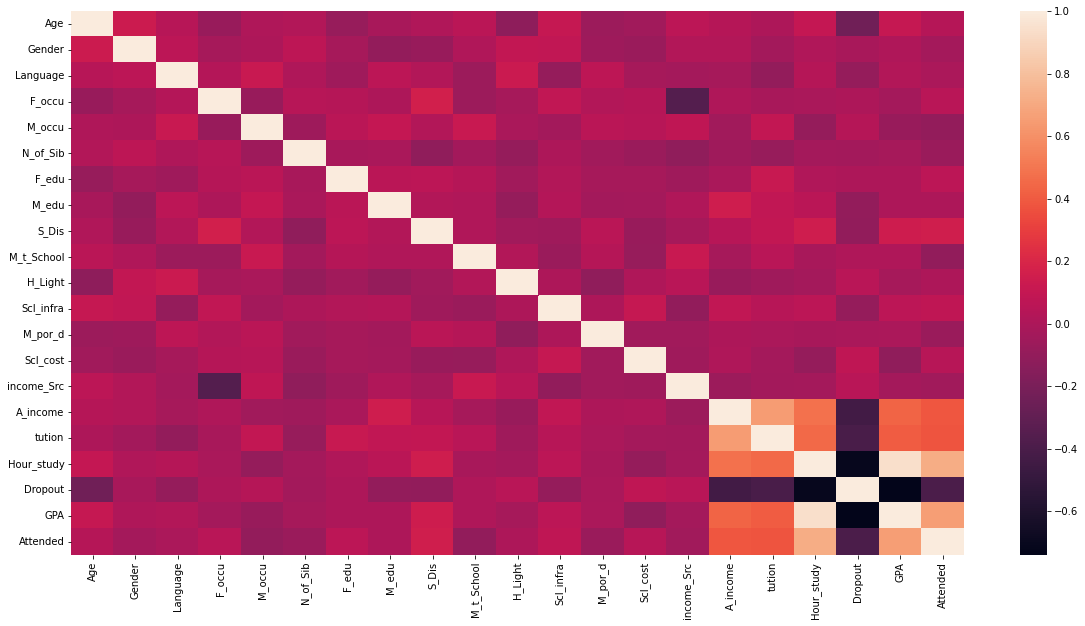

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Coorelation')

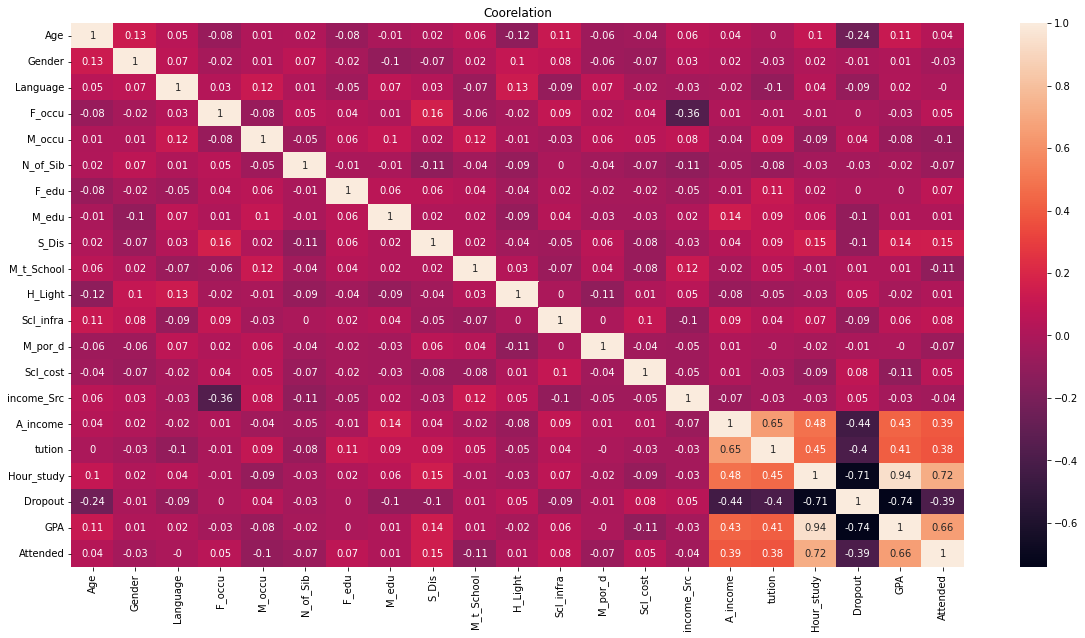

In [21]:
corr=df.corr().round(2)
plt.figure(figsize=(20,10))
plot=sns.heatmap(corr,annot=True)
plt.title('Coorelation')

In [22]:
x=df.drop('Dropout',axis=1)
y=df['Dropout']

## Train test split

In [23]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=75)

Feature selection

In [24]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(xtrain,ytrain)
mutual_info

array([0.03835979, 0.03884823, 0.03175792, 0.01190805, 0.04367824,
       0.        , 0.0039146 , 0.03867419, 0.        , 0.00386419,
       0.        , 0.07754536, 0.        , 0.        , 0.        ,
       0.21243547, 0.13126122, 0.36658733, 0.51588396, 0.04899203])

In [25]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=xtrain.columns
mutual_info.sort_values(ascending=False)

GPA           0.515884
Hour_study    0.366587
A_income      0.212435
tution        0.131261
Scl_infra     0.077545
Attended      0.048992
M_occu        0.043678
Gender        0.038848
M_edu         0.038674
Age           0.038360
Language      0.031758
F_occu        0.011908
F_edu         0.003915
M_t_School    0.003864
S_Dis         0.000000
M_por_d       0.000000
Scl_cost      0.000000
income_Src    0.000000
N_of_Sib      0.000000
H_Light       0.000000
dtype: float64

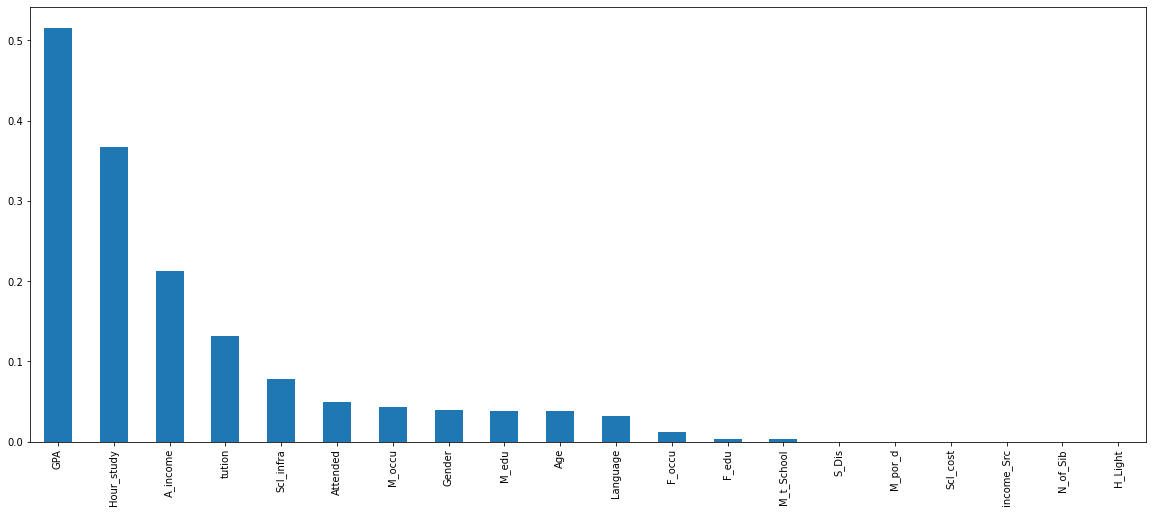

In [26]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

## model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC


In [28]:
models={
    'RF':RandomForestClassifier(),
'adaBoost':AdaBoostClassifier(),
'GBC':GradientBoostingClassifier(),
'ExtraTree': ExtraTreesClassifier(),
'DT':DecisionTreeClassifier(),
'BNB':BernoulliNB(),
'MNB':MultinomialNB(),
'GNB':GaussianNB(),
'KNN':KNeighborsClassifier(),
'SVM':SVC()
}

In [29]:
# Training the models 
for k,v in models.items():
  v.fit(xtrain,ytrain)


In [42]:

for k,v in models.items():
  print(k,'  :  ',v.evaluate(xtrain,ytrain))

AttributeError: ignored

In [ ]:

for k,v in models.items():
  print(k,'  :  ',v.score(xtrain,ytrain))

In [30]:
#drowing roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_roc_curve(models,x_dtest,y_dtest):
  pred_d={}
  for k,v in models.items():
    pred_d[k+'_pred_d']=v.predict(x_dtest)
  

  rocScore={}
  for k,v in pred_d.items():
    rocScore[k+'roc']=roc_auc_score(y_dtest,v)

  fp_tp_d={}
  for k,v in pred_d.items():
    fpr,tpr,_=roc_curve(y_dtest,v)
    fp_tp_d[k+'roc']={'fpr':fpr,'tpr':tpr}

  plt.figure(figsize=(15,8))
  plt.title('Roc Curve')
  for k,v in fp_tp_d.items():
    plt.plot(v['fpr'],v['tpr'],marker='.',label= k+": %.3f"%rocScore[k])
    plt.xlabel('False positive Rate')
    plt.ylabel('True POsitive Rate')
    
    plt.legend()
    
  plt.show()

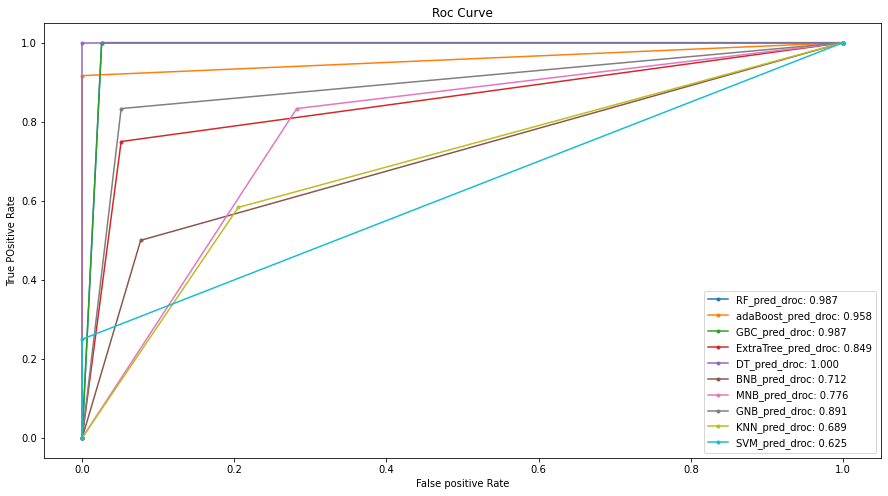

In [31]:
plot_roc_curve(models,xtest,ytest)

In [32]:
#Precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [35]:
# lr_probs = model.predict_proba(testX)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # predict class values
# yhat = model.predict(testX)
# lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# # summarize scores
# print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# # plot the precision-recall curves
# no_skill = len(testy[testy==1]) / len(testy)
# pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('Recall')
# pyplot.ylabel('Precision')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()

In [38]:
models['SVM'].predict(xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0])

In [34]:
def plot_precission_recall_curve(models,xtest,ytest):
  prob={}
  for k,v in models.items():
    p=v.predict_proba(xtest)
    prob=p[:, 1]
  
  prob={}
  for k,v in models.items():
    p=v.predict(xtest)
    lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
    lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

  rocScore={}
  for k,v in pred.items():
    rocScore[k+'roc']=roc_auc_score(ytest,v)

  fp_tp_d={}
  for k,v in pred.items():
    fpr,tpr,_=roc_curve(ytest,v)
    fp_tp_d[k+'roc']={'fpr':fpr,'tpr':tpr}

  plt.figure(figsize=(15,8))
  plt.title('Roc Curve')
  for k,v in fp_tp_d.items():
    plt.plot(v['fpr'],v['tpr'],marker='.',label= k+": %.3f"%rocScore[k])
    plt.xlabel('False positive Rate')
    plt.ylabel('True POsitive Rate')
    
    plt.legend()
    
  plt.show()

# calculate the auc roc
rf_auc=roc_auc_score(ytest,rf_pred)
dt_auc=roc_auc_score(ytest,dt_pred)
lr_auc=roc_auc_score(ytest,lr_pred)

In [ ]:
print('Random forest auc:',rf_auc)
print('Decision tree auc:',dt_auc)
print('Logistic Regression auc:',lr_auc)


In [ ]:
rf_fpr,rf_tpr,_=roc_curve(ytest,rf_pred)
dt_fpr,dt_tpr,_=roc_curve(ytest,dt_pred)
lr_fpr,lr_tpr,_=roc_curve(ytest,lr_pred)

In [ ]:
def plot_roc_curve(rf_fpr,rf_tpr):
    plt.title('Roc Curve')
    plt.plot(rf_fpr,rf_tpr,marker='.',label="Random Forest: %.3f"%rf_auc)
    plt.plot(dt_fpr,dt_tpr,marker='.',label="decision tree: %.3f"%dt_auc)
    plt.plot(lr_fpr,lr_tpr,marker='.',label="Logistic Regression: %.3f"%lr_auc)
    plt.xlabel('False positive Rate')
    plt.ylabel('True POsitive Rate')
    
    plt.legend()
    plt.show()

In [ ]:
plot_roc_curve(rf_fpr,rf_tpr)

In [ ]:
print(classification_report(ytest,rf_pred))

In [ ]:
print(classification_report(ytest,dt_pred))

In [ ]:
print(classification_report(ytest,lr_pred))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
def scores(test,pred):
  print('Precision: %.3f' % precision_score(test, pred))
  print('recall: %.3f' % recall_score(test, pred))
  print('f1: %.3f' % f1_score(test, pred))
  print('accuracy score: %.3f' % accuracy_score(test, pred))

In [ ]:
scores(ytest,rf_pred)

In [ ]:
scores(ytest,dt_pred)

In [ ]:
scores(ytest,lr_pred)

## Optimization

#Grid search cv

 ##k - fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimatros=[i for i in range(1,100,2)]
max_features=['auto','sqrt','log2']
max_depth=[2,4]
min_samples_split=[2,5]
min_sample_leaf =[1,2]
boostrap=[True,False]

In [ ]:
rf_param_grid={
    'n_estimators': n_estimatros,
    'max_features': max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_sample_leaf,
    'bootstrap':boostrap
}
dt_param_grid={
    
    'max_features': max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_sample_leaf,
    
}

In [ ]:
print(rf_param_grid)

In [ ]:
rf_grid=GridSearchCV(estimator=rfc,param_grid=rf_param_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
rf_grid.fit(xtrain,ytrain)

In [ ]:
rf_grid.best_estimator_

In [ ]:
print('train accuracy:',rf_grid.score(xtrain,ytrain))
print('test accuracy:',rf_grid.score(xtest,ytest))

## randomized CV

In [ ]:
 from sklearn.model_selection import RandomizedSearchCV
 rf_rcv=RandomizedSearchCV(estimator=rfc,param_distributions=rf_param_grid,cv=3,verbose=2,n_jobs=4)
 dt_rcv=RandomizedSearchCV(estimator=DT,param_distributions=dt_param_grid,cv=3,verbose=2,n_jobs=4)
#  lr_rcv=RandomizedSearchCV(estimator=LR,param_distributions=param_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
rf_rcv.fit(xtrain,ytrain)
dt_rcv.fit(xtrain,ytrain)

In [ ]:
print(rf_rcv.best_estimator_)
print(dt_rcv.best_estimator_)

In [ ]:
print(rf_rcv.score(xtest,ytest))
print(dt_rcv.score(xtest,ytest))